# Caso RRHH

Uno de los mayores retos de una empresa es contratar y retener al personal que tienen para sacar el mejor provecho de los mismos y que a la vez hagan que la empresa salga adelante.

Elegir a las personas tiene un costo intrínseco (promocionar la vacante, buscar gente, aplicar entrevistas, exámenes, etc) y cuando se elige a una persona errónea, en el mejor de los casos, este costo invertido en esa tarea "se va a la basura" y puede ser peor si la persiona contratada genera alguna situación que le haga perder a la empresa (fraude, toma una mala decisión, pierde algún cliente, etc).

Así que contratar a una persona es toda una inversión. No podemos entrevistar a todos los candidatos que mandan su información.

Al contratar a una persona también hay que formarles, recompensarles, ponerles algún objetivo, etc.

Tenemos un gran conjunto de datos que ha recopilado el equipo de RRHH y debemos desarrollar un modelo que pueda predecir qué empleados tienen más probabilidad de renunciar.

Parte de los datos que tienen el departamento de RRHH son:
- Participación laboral,
- Nivel de educación,
- Satisfacción laboral,
- Clasificación de rendimiento,
- Satisfacción en las relaciones (jefe, compañeros),
- Equilibrio entre trabajo y vida personal.

En base a estos datos desarrollaremos un modelo para ver si una persona se queda o se va.

## Importamos librerías a utilizar y el dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv("Human_Resources.csv")

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

Podemos ver que es un registro de 1,470 personas con 35 atributos.

Según el craedor, así es como están clasificadas las siguientes columnas:

Education:
    
    1 'Below College',
    2 'College',
    3 'Bachelor',
    4 'Master',
    5 'Doctor'

EnvironmentSatisfaction:

    1 'Low',
    2 'Medium',
    3 'High',
    4 'Very High'

JobInvolvement:
    
    1 'Low',
    2 'Medium',
    3 'High',
    4 'Very High'

JobSatisfaction:

    1 'Low',
    2 'Medium',
    3 'High',
    4 'Very High'

PerformanceRating:

    1 'Low',
    2 'Good',
    3 'Excellent',
    4 'Outstanding',

RelationshipSatisfaction:
    
    1 'Low',
    2 'Medium',
    3 'High',
    4 'Very High'

WorkLifeBalance:
    
    1 'Bad',
    2 'Good',
    3 'Better',
    4 'Best'

In [5]:
data.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Podemos ver que no hay datos faltantes en el dataset.

Para ver los datos estadísticos de las variables:

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Esta tabla nos muestra mucha información general, por ejemplo:
- Edad: Hay gente quen tiene 18 años y gehte que llega a los 65, mientras que la edad media es de 36 años.
- Sueldo Diario: empleados que ganan desde 102 hasta 1,499 con una media de 802. 
- etc.

## Visualización de datos:

Para visualizar los datos vamos a tener que convertir algunas de las variables categóricas en variables numéricas (ya que los modelos sólo aceptan valores numéricos. por ejemplo para las columnas "Attrition" (columna target) y "OverTime" podemos cambiarlo utilizando una función `lambda` ya que los valores son Yes / No. 

In [8]:
#reemplazamos las valores de las columnas:
data["Attrition"] = data["Attrition"].apply(lambda x: 1 if x=="Yes" else 0)
data["OverTime"] = data["OverTime"].apply(lambda x: 1 if x=="Yes" else 0)

In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<AxesSubplot:>

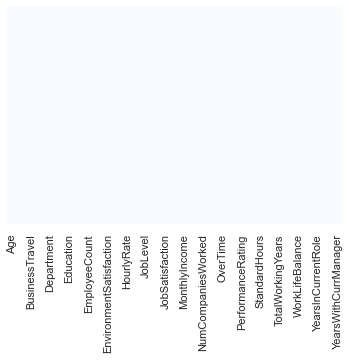

In [10]:
#Vamos a ver si hay valores faltantes con un heatmap de seaborn
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="Blues")

Vemos que no hay valores faltantes porque no aparecen en nuestro mapa de calor.

Vamos a realizar un histograma para cada colmna y poder ver características generales de cada una de ellas:

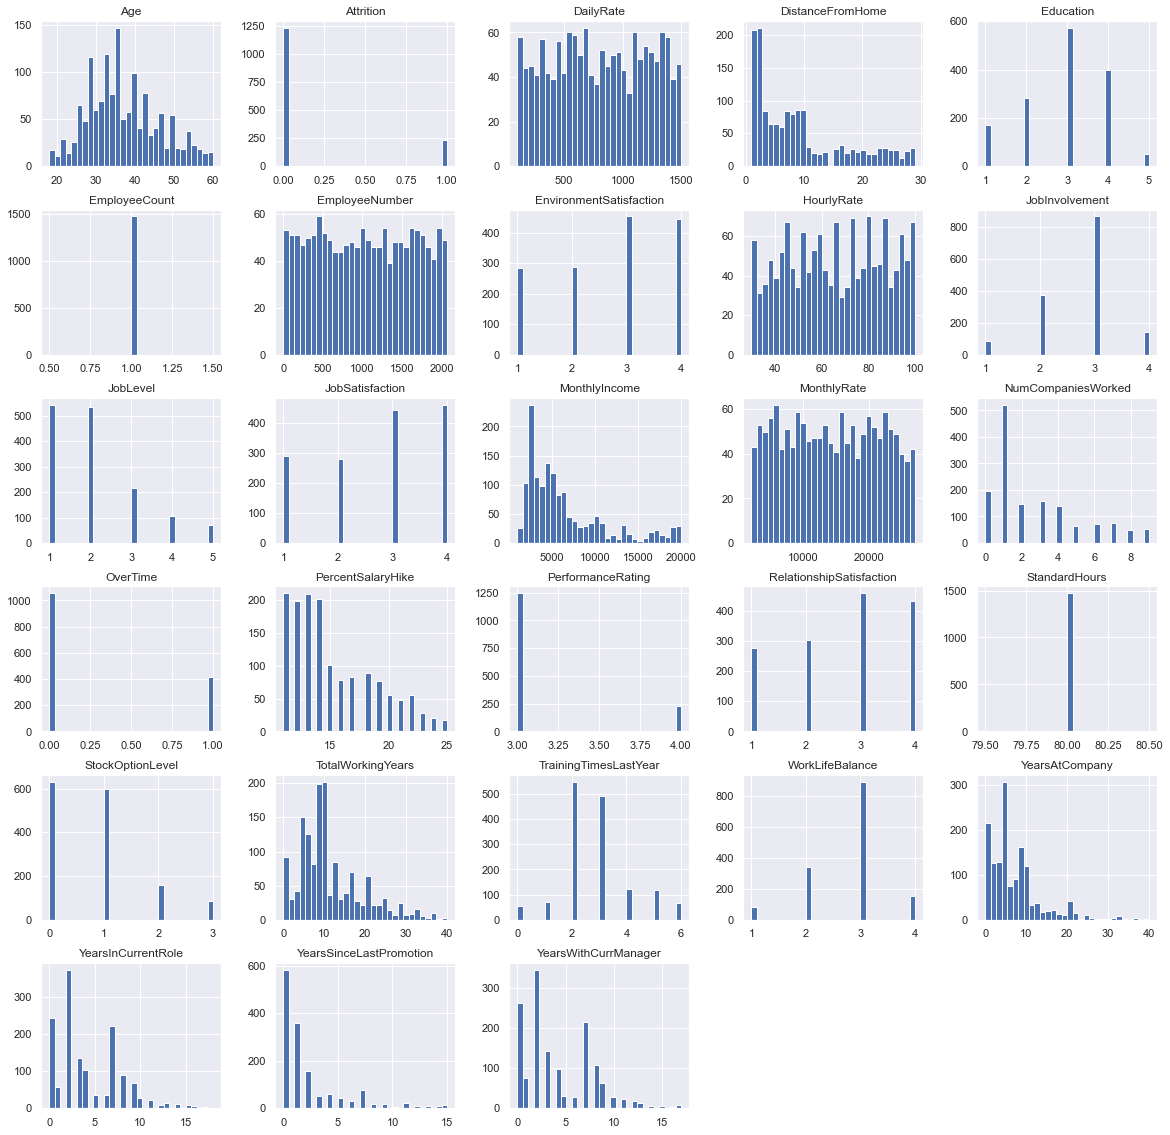

In [11]:
data.hist(bins=30, figsize=(20,20), color="b")
plt.show()

Con los histogramas nos podemos dar cuenta de cómo se distribuye cada una de las variables (columnas o features). Poer ejemplo podemos ver que casi el 20% de los empleados se van (1 en Attrition), o que hay variables como `EmployeeCount`, `StandarHours` que sólo tienen un dato, por lo que no es necesario consevarlas para realizar el modelo (las podemos eliminar), mismo para Over18, ya que el min en edades es 18, por lo que se presume que todos son mayores de 18 años). Para el caso de `EmpolyeeNumber` tampoco es necesario, ya que es el número que le corresponde a cada persona y tampoco es necesario.

In [12]:
data.drop(["EmployeeCount","StandardHours", "Over18", "EmployeeNumber"], axis=1, inplace=True)

In [13]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Vamos a hacer un análisis de qué empleados dejan la compañía y cuáles se quedan:

In [14]:
left_data = data[data["Attrition"]== 1]
stayed_data = data[data["Attrition"]== 0]

In [15]:
print ("El total de empleados de la compañía es: ", len(data))
print ("El número de empleados que se quedan: ", len(stayed_data), " y representan el ", (len(stayed_data)/len(data))*100, "% del total de empleados")
print ("El número de empleados que se fueron: ", len(left_data), " y representan el ", (len(left_data)/len(data))*100, "% del total de empleados")

El total de empleados de la compañía es:  1470
El número de empleados que se quedan:  1233  y representan el  83.87755102040816 % del total de empleados
El número de empleados que se fueron:  237  y representan el  16.122448979591837 % del total de empleados


Podemos comparar los datos estadísticos de los que se van vs los que se quedan:

In [16]:
left_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
Attrition,237.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0


In [17]:
stayed_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.0,31.0,36.0,43.0,60.0
Attrition,1233.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
DailyRate,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.770479,0.692050,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0


Vamos a hacer la matriz de correlación para ver qué factores tienen relaciones entre sí

<AxesSubplot:>

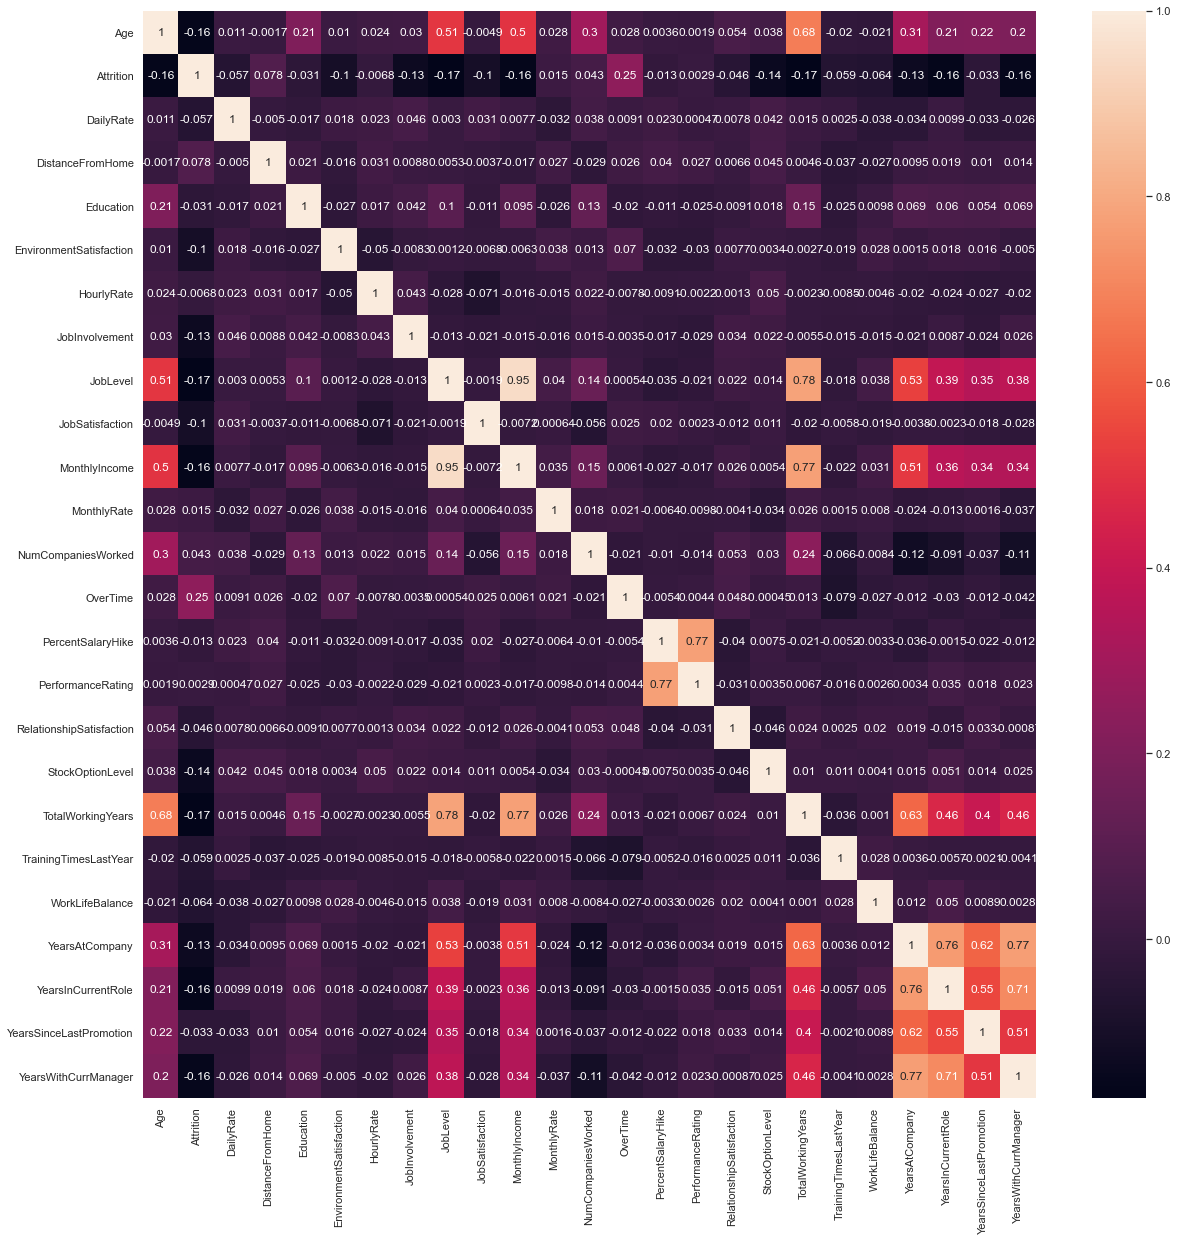

In [18]:
corr = data.corr()
f, ax =plt.subplots(figsize= (20,20))
sns.heatmap(corr, annot=True, cmap= "coolwarm")

Podemos ver:
- La correlación más alta es JobLevel con MonthlyIncome
- También tenemos que la Age con TotalWorkingYears, MonthlyIncome y JobLevel
- YearsAtCompany también tiene buena correlación con TotalWokingYeras, JobLevel y MontlyIncome

Vamos a analizar diferentes gráficos para ver las distribuciones:

<AxesSubplot:xlabel='Age', ylabel='count'>

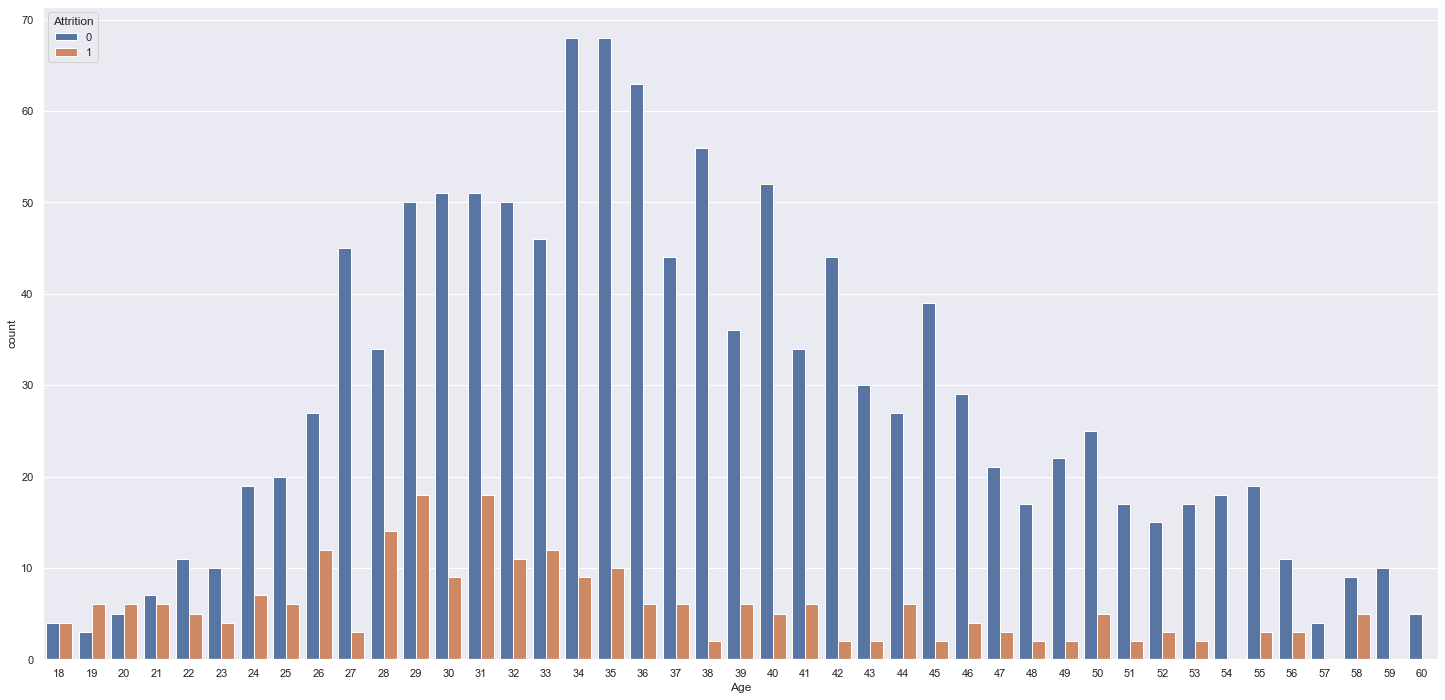

In [19]:
plt.figure(figsize=[25,12])
sns.countplot(x="Age", hue="Attrition", data=data)

Vemos que entre los 28 a 33 está el grueso de la gente que se va. Al llegar a los 29 tenemos el primer pico de salidas, que podría deberse a que forman una familia o tienen algún cambio de vida (puede ser una crsis de edad).

Vemos otros gráficos:

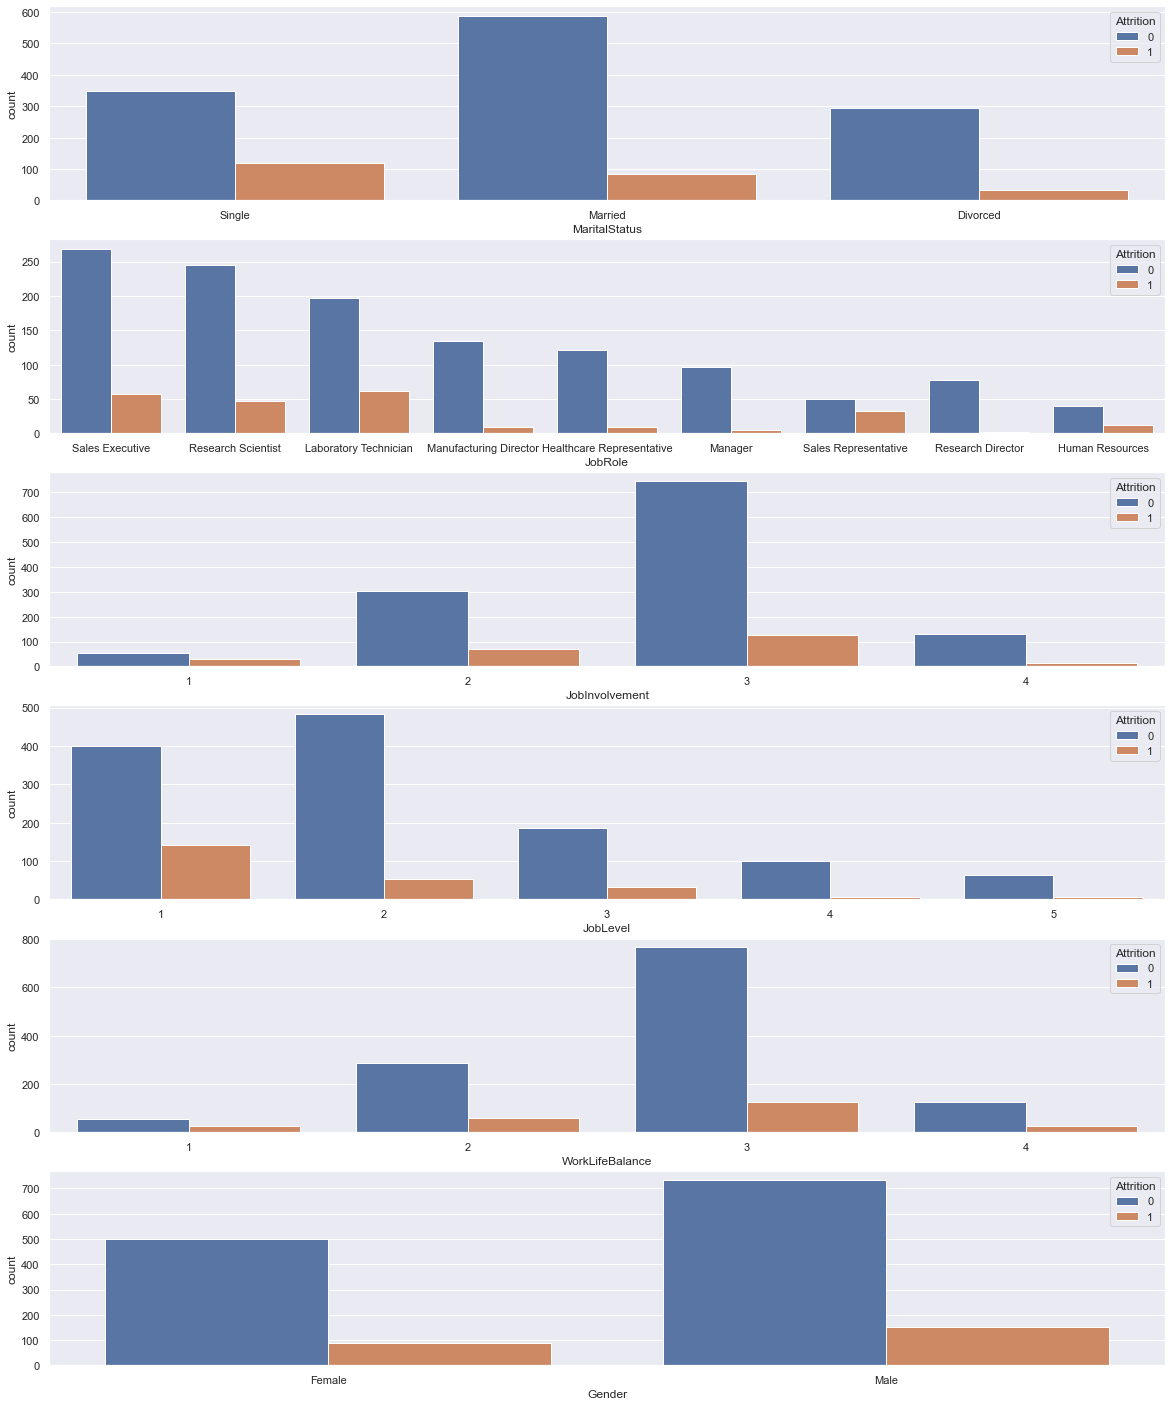

In [20]:
plt.figure(figsize=[20,25])

plt.subplot (611)
sns.countplot(x="MaritalStatus", hue="Attrition", data=data)

plt.subplot (612)
sns.countplot(x="JobRole", hue="Attrition", data=data)

plt.subplot (613)
sns.countplot(x="JobInvolvement", hue="Attrition", data=data)

plt.subplot (614)
sns.countplot(x="JobLevel", hue="Attrition", data=data)

plt.subplot (615)
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=data)

plt.subplot (616)
sns.countplot(x="Gender", hue="Attrition", data=data)

plt.show()

En el gráfico anterior pordemos ver:

- Marital Status:Los que más fácilmente se van son los solteros.

- Job Role: Los puestos con mayor salida de personal son: Ventas (Ejecutivos y representantes), Técnicos de laboratorio e Investigadores. Más de la mitad de los representantes de ventas se van (demasiada rotación).

- Job Involvement: De igual forma los que más se van son los que tienen una participación laboral Alta. Aunque a las personas que se involucran poco les da lo mismo quedarse que irse.

- Job Level: Los que más salen son los de 1er nivel.

- Work - Life Balance: En proporción, la gente con un mal balance entre el trabajo uy la vida tienden a irse. Los que más se van son los que tienen el mejor balance (aunque también son los que más se quedan en proporción).

- Gender: Pordemos ver que en total salen más hombres que mujeres, auqnue tendríamos que ver la proporción, para validar que sea así.

In [21]:
#Para ver la proporción de hombres de hombres y mujeres que se van vs los que se quedan:
print ("% de hombres que se van: ", (len(left_data["Gender"]=="Male")/len(data["Gender"]=="Male")*100))
print ("% de mujeres que se van: ", (len(left_data["Gender"]=="Female")/len(data["Gender"]=="Female")*100))

% de hombres que se van:  16.122448979591837
% de mujeres que se van:  16.122448979591837


Vemos que el porcentaje de hombres y el porcentaje de mujeres que se van de la empresa son el mismo, así que el Género no es tan importante a considerar.

Text(0.5, 0, 'Distancia desde casa al trabajo')

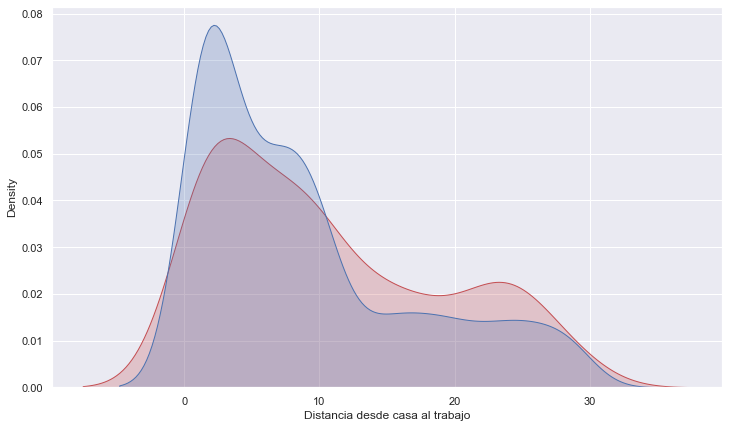

In [22]:
plt.figure (figsize=[12,7])

#Gráfico para variables continuas
sns.kdeplot(left_data["DistanceFromHome"], label = "Empleados que se marchan", shade=True, color="r")
sns.kdeplot(stayed_data["DistanceFromHome"], label = "Empleados que se quedan", shade=True, color="b")

plt.xlabel("Distancia desde casa al trabajo")

En el gráfico vemos que la densidad de los empleqdos que ase marchan es mayor cuando la distancia de la casa al trabajo es mayor a 11km, pudiendo ser una factor determinandte.

Text(0.5, 0, 'Número de años con el mismo gerente')

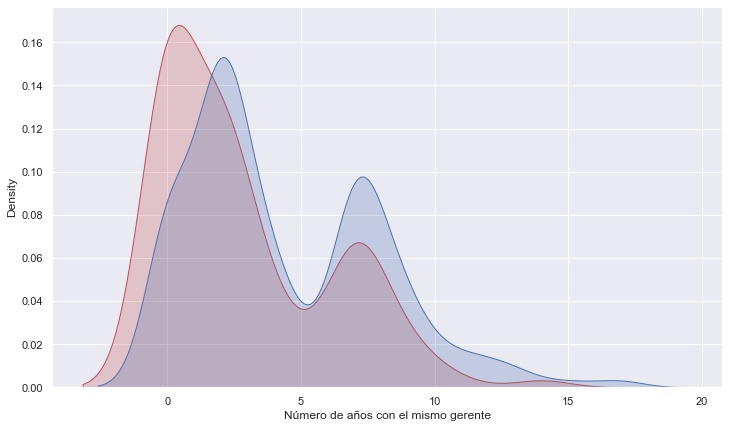

In [23]:
plt.figure (figsize=[12,7])

#Gráfico para variables continuas
sns.kdeplot(left_data["YearsWithCurrManager"], label = "Empleados que se marchan", shade=True, color="r")
sns.kdeplot(stayed_data["YearsWithCurrManager"], label = "Empleados que se quedan", shade=True, color="b")

plt.xlabel("Número de años con el mismo gerente")

Podemos ver que se van más fácilmente cuando tienen menos de 2 años con el mismo gerente. También podemos ver que después de los 5 años es más dificil que se vayan (si trabajan con el mismo gerente)

Text(0.5, 0, 'Número total de años trabajados')

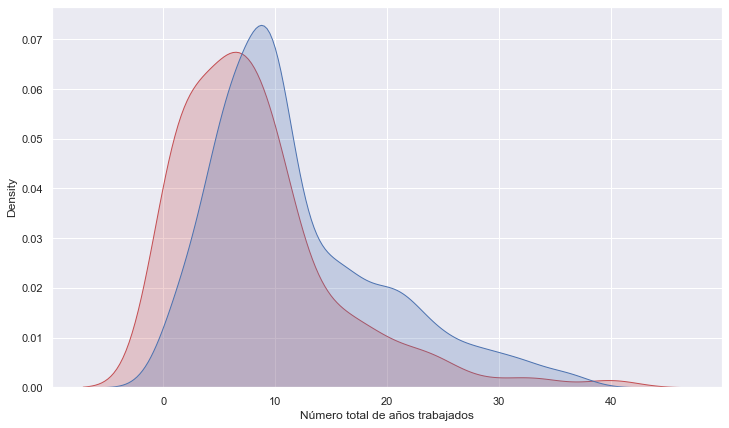

In [24]:
plt.figure (figsize=[12,7])

#Gráfico para variables continuas
sns.kdeplot(left_data["TotalWorkingYears"], label = "Empleados que se marchan", shade=True, color="r")
sns.kdeplot(stayed_data["TotalWorkingYears"], label = "Empleados que se quedan", shade=True, color="b")

plt.xlabel("Número total de años trabajados")

Podemos ver que la gente se va en los primeros 8 años de estar trabajando y cuando tienen más de 40 años trabajando (este dato no es significativo, porque puede ser por jubilación).

Text(0.5, 0, 'Número total de compañías en las que ha trabajado anteriormente')

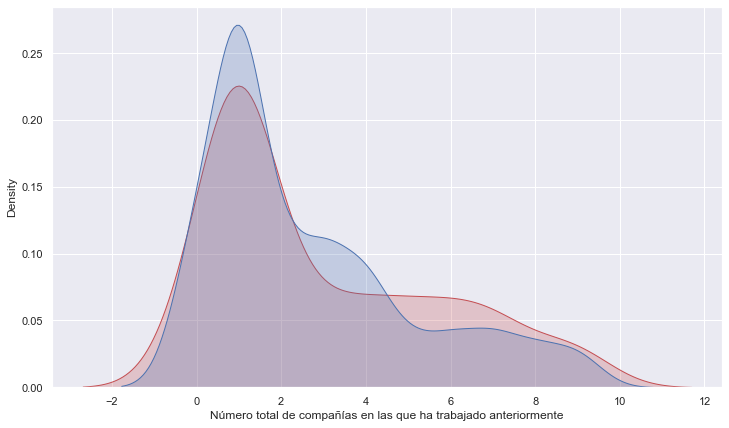

In [25]:
plt.figure (figsize=[12,7])

#Gráfico para variables continuas
sns.kdeplot(left_data["NumCompaniesWorked"], label = "Empleados que se marchan", shade=True, color="r")
sns.kdeplot(stayed_data["NumCompaniesWorked"], label = "Empleados que se quedan", shade=True, color="b")

plt.xlabel("Número total de compañías en las que ha trabajado anteriormente")

Podemos ver que cuando la persona ha trabajado en más de 4 compañías anteriormente es más probable de que se vaya de la empresa.

Text(0.5, 0, 'Número de horas extras')

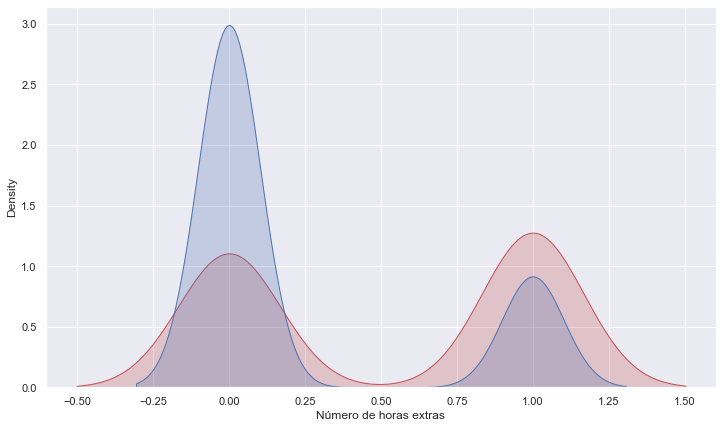

In [26]:
plt.figure (figsize=[12,7])

#Gráfico para variables continuas
sns.kdeplot(left_data["OverTime"], label = "Empleados que se marchan", shade=True, color="r")
sns.kdeplot(stayed_data["OverTime"], label = "Empleados que se quedan", shade=True, color="b")

plt.xlabel("Número de horas extras")

La gente que hace horas extras es la que se va más fácilmente de la compañía.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

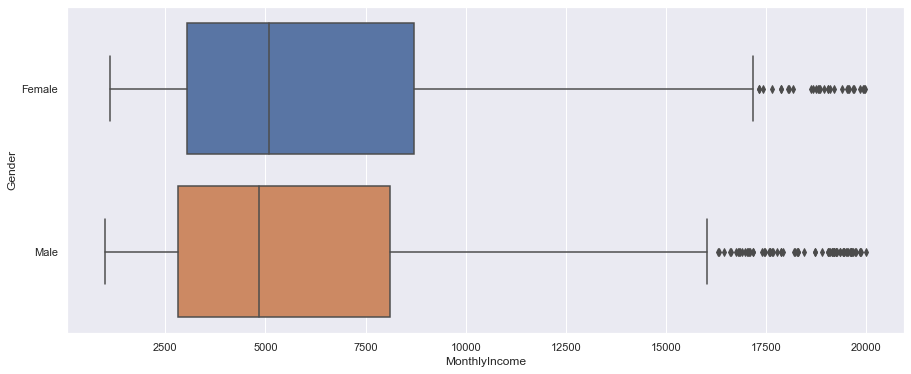

In [27]:
plt.figure(figsize=[15,6])
sns.boxplot(x="MonthlyIncome", y="Gender", data=data)

Podemos ver que los sueldos son muy parecidos, aunque las mujeres ganan un poco más que los hombres. La mediana de sueldo de las muejeres es muy parecida, el 75% de las mujeres gana más que el 75% de los hombres. En ambos casos hay outliers.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

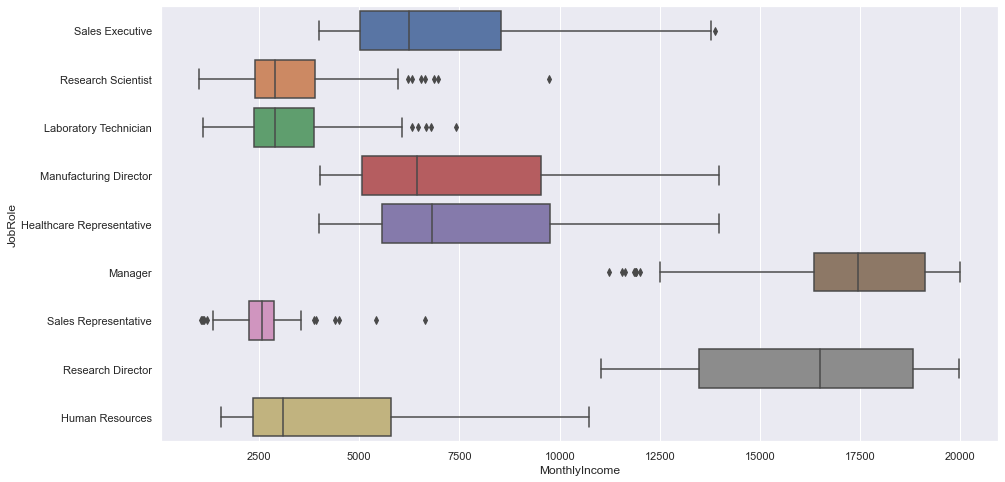

In [28]:
plt.figure(figsize=[15,8])
sns.boxplot(x="MonthlyIncome", y="JobRole", data=data)

Vemos que quienes ganan más son los Managers (aunque hay varios que ganan menos -outliers-), de igual forma los Directores de Investigación (tienen sueldos más variados, pero todos están dentro del rango).

Los que ganan menos son los Representantes de Ventas (que habíam os visto arriba que era donde había más rotación y con esto podemos ver que puede ser por los sueldos). 

También podemos ver que la mayoría de puestos hay mucha diferencia entre el que menos gana y el que más gana (largo de los bigotes en las mayorías de las cajas).

## Preprocesamiento y limpieza de datos

In [29]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Separamos la variables categóricas:

In [30]:
X_cat = data[["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]]

In [31]:
#visualizamos:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [32]:
x_cat_columns= X_cat.columns.tolist()

In [33]:
x_cat_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

Vamos a cambiar de categorías a números poara poder introducirlos a los modelos de Machine Learning

In [34]:
def createDummies(df, var_name):
    '''
    Esta función convierte en dummies las columnas de un dataset
    
    In:
    DataFrame, 
    Columnas para convertir en dummy.
    
    Output:
    Dataframe con las columnas en dummies.
    '''
    
    dummy = pd.get_dummies(df[var_name], prefix=var_name)
    df = df.drop(var_name, axis=1)
    df = pd.concat([df, dummy], axis= 1)
    return df

In [35]:
X_cat = createDummies(X_cat, x_cat_columns)

In [36]:
X_cat

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [37]:
X_cat.shape

(1470, 26)

Hacemos un dataset con las variables numéricas (quitando `Attrition`, que es la variable target)

In [38]:
X_num = data.drop(["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Attrition"], axis=1)

In [39]:
X_num.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [40]:
X_num.shape

(1470, 24)

Juntamos los dos datasets: `X_cat` y `X_num` para formar un solo dataset `X`

In [41]:
X = pd.concat([X_cat, X_num], axis=1)

In [42]:
X

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,...,3,1,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,0,1,0,0,...,4,4,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,0,0,0,...,3,2,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,1,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,0,0,0,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,3,3,1,17,3,3,5,2,0,3
1466,0,0,1,0,1,0,0,0,0,1,...,3,1,1,9,5,3,7,7,1,7
1467,0,0,1,0,1,0,0,1,0,0,...,4,2,1,6,0,3,6,2,0,3
1468,0,1,0,0,0,1,0,0,0,1,...,3,4,0,17,3,2,9,6,0,8


In [43]:
X.shape

(1470, 50)

In [44]:
X_cols = X

Vamos a escalar los datos para que el(los) modelo(s) a utilizar tome en cuenta todas las variables de la misma forma y no le dé mayor peso a las variables que tienen valores más grandes (como los ingresos, sobre las distancias).

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
#Creamos el objeto (escalador):
scaler= MinMaxScaler()

In [47]:
#Escalamos los datos:
X = scaler.fit_transform(X)

In [48]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [49]:
#Definimos y que es nuestro target
y= data.Attrition

In [50]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Elección de Métricas (KPIs de evaluación de modelos)

Para un `modelo de clasificación` vamos a utilizar la `matriz de confusión` que nos muestra la forma en que clasificó el modelo que estamos entrenando. A partir de la matriz vamos a revisar 4 indicadores y prestar especial atención a 2 de ellos:

**Accuracy (Exactitud):** Nos dice qué tan bien predijo el modelo. Se representa como  la proporción de resultados verdaderos (tanto verdaderos positivos (TP) como verdaderos negativos (TN)) dividido entre el número total de casos examinados.

En forma práctica,  el accuracy es  la cantidad de predicciones que fueron correctas.

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

**Precision (Precisión):**  Se refiere a la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud. Cuanto menor es la dispersión mayor la precisión. Se representa por la proporción de verdaderos positivos dividido entre todos los resultados positivos (tanto verdaderos positivos, como falsos positivos).En forma práctica es  el porcentaje de casos positivos detectados.

$$Precision = \frac{VP}{VP+FP}$$

**Recall (Sensibilidad):** Es un valor que nos indican la capacidad de nuestro modelo para discriminar los casos positivos, de los negativos. Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo.

$$Recall = \frac{VP}{VP+FN}$$  

O lo que sería igual :  "Verdaderos positivos / Total de enfermos" (en el área de la salud se dice que la sensibilidad es la capacidad de de poder detectar correctamente la enfermedad entre los enfermos).

**F1 Score:** Es otra métrica muy empleada porque resume la precisión y recall en una sola métrica. Por ello es de gran utilidad cuando la distribución de las clases es desigual (datasets desbalanceados).

$$F1 \ score \ =  \frac{2 * (Recall * Precision)}{(Recall + Precision)}$$


---

Antes de inicar con los modelos vamos a **separar los datos para entrenamiento y prueba**, utilkizando el 75% de los datos para entrenar el modelo y el 25% para prueba.

In [51]:
#Importamos la librería 
from sklearn.model_selection import train_test_split

In [52]:
#Separamos los datos para entrenamiento y prueba:
#Estratificamos y para que haya cantidades iguales de "se queda" y "se va" en el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [53]:
print ("Datos para X_train: ", X_train.shape)
print ("Datos para y_train: ", y_train.shape)
print ("Datos para X_test: ", X_test.shape)
print ("Datos para y_test: ", y_test.shape)

Datos para X_train:  (1102, 50)
Datos para y_train:  (1102,)
Datos para X_test:  (368, 50)
Datos para y_test:  (368,)


## Modelo Bench Mark

Vamos a utilizar el modelo de `Regresión Logística` como primer modelo para revisar el comportamiento de los datos.

In [54]:
#Importamos librerías:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
#creamos el modelo
lr = LogisticRegression()

In [56]:
#Entrenamos el modelo
lr.fit(X_train, y_train)

LogisticRegression()

In [57]:
#Predecimos el modelo
y_pred = lr.predict(X_test)

In [58]:
#Importamos librerías para las métricas:
from sklearn.metrics import confusion_matrix, classification_report

In [59]:
#Para ver el accuracy:
accuracy_score(y_test, y_pred)

0.8722826086956522

Podemos ver que el accuracy lo marca como 0.87, esto quiere decir que el modelo predijo el 87% de los datos.

Para ver la matriz de confusión:

In [60]:
confusion_matrix(y_test, y_pred)

array([[300,   9],
       [ 38,  21]])

Podemos ver que predice mal 47 (38+9) de los casos.

In [61]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       309
           1       0.70      0.36      0.47        59

    accuracy                           0.87       368
   macro avg       0.79      0.66      0.70       368
weighted avg       0.86      0.87      0.85       368



Vemos que el modelo consigue:

- Precisición:
    - 89% para la clase 0 (se queda)
    - 70% para la clase 1 (se va)

- Recall:
    - 97% para la clase 0 (se queda)
    - 36% para la clase 1 (se va)

- F1 score:
    - 93% para la clase 0 (se queda)
    - 47% para la clase 1 (se va)

- Accuracy del 87%

Podemos ver que tanto el recall como el f1 score son muy bajos (memnos del 50%) para la clase 1 (se va de la empresa), por lo que el modelo no es muy bueno para predecir cuándo se iría un empleado.

Vamos a mejorar los hiperparámetros del modelo con `GridSearch`.

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
#creamos la grilla con los hiperparámetros a probar:
param_grid1 = {'tol': [0.0001, 0.00001],
              'C': [1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7],
              'max_iter':[100, 95, 90, 85, 80, 75, 70],
              'warm_start':['True', 'False']}

In [64]:
# creamos el modelo:
model = GridSearchCV(lr, param_grid=param_grid1, cv=3)

In [65]:
#entrenamos el mopdelo
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7],
                         'max_iter': [100, 95, 90, 85, 80, 75, 70],
                         'tol': [0.0001, 1e-05],
                         'warm_start': ['True', 'False']})

In [66]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'C': 0.9, 'max_iter': 100, 'tol': 0.0001, 'warm_start': 'True'}
Mejor Score: 0.8856671800339613



In [67]:
#Hacemos el modelo con los mejores resultados:
lr2 = LogisticRegression(C=0.9, max_iter=100, tol=0.0001, warm_start=True, random_state=42)

In [68]:
#Entrenamos el modelo:
lr2.fit(X_train, y_train)

LogisticRegression(C=0.9, random_state=42, warm_start=True)

In [69]:
#Predecimos:
y_pred_lr2= lr2.predict(X_test)

In [70]:
#Para ver el accuracy:
accuracy_score(y_test, y_pred_lr2)

0.8695652173913043

In [71]:
#Matriz de confusión:
confusion_matrix(y_test, y_pred_lr2)

array([[301,   8],
       [ 40,  19]])

In [72]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       309
           1       0.70      0.36      0.47        59

    accuracy                           0.87       368
   macro avg       0.79      0.66      0.70       368
weighted avg       0.86      0.87      0.85       368



Podemos ver que realmente no hubo muchos cambios entre el modelo sin cambiar los hiperparámetros.

Vamos a probar con **Random Forest** para ver si mejora el modelo.

In [73]:
#Importamos librerías:
from sklearn.ensemble import RandomForestClassifier

In [74]:
#creamos el modelo:
forest = RandomForestClassifier()

In [75]:
#Entrenamos el modelo:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
#Predecimos el modelo:
y_pred2= forest.predict(X_test)

In [77]:
#Para ver el accuracy:
accuracy_score(y_test, y_pred2)

0.8396739130434783

In [78]:
#Hacemos la matriz de confusión:
confusion_matrix(y_test, y_pred2)

array([[301,   8],
       [ 51,   8]])

In [79]:
print (classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       309
           1       0.50      0.14      0.21        59

    accuracy                           0.84       368
   macro avg       0.68      0.55      0.56       368
weighted avg       0.80      0.84      0.80       368



**Vamos a probar diferentes hiperparámetros para ver si mejora el modelo:**

In [80]:
#Hacemos la grilla para Grid Search:
param_grid2 = {'n_estimators': [200, 300, 400, 500, 750, 1000],   
              'min_samples_split': [2,3,4,5],    
              'min_samples_leaf':[1,3,5], 
             }   

In [81]:
#creamos el modelo:
model2 = GridSearchCV(forest, param_grid=param_grid2)

In [82]:
#entrenamos el modelo:
model2.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [200, 300, 400, 500, 750, 1000]})

In [83]:
print("Mejores parametros: "+str(model2.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Mejor Score: 0.8856671800339613



In [84]:
#Hacemos el modelo con los mejores resultados:
forest2= RandomForestClassifier(min_samples_leaf=1, min_samples_split=3, n_estimators=400, random_state=42)

In [85]:
#Entrenamos el nuevo modelo:
forest2.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=400, random_state=42)

In [86]:
#Predecimos:
y_pred_forest2= forest2.predict(X_test)

In [87]:
#Para ver el accuracy:
accuracy_score(y_test, y_pred_forest2)

0.8369565217391305

In [88]:
#Hacemos la matriz de confusión:
confusion_matrix(y_test, y_pred_forest2)

array([[301,   8],
       [ 52,   7]])

In [89]:
print (classification_report(y_test, y_pred_forest2))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       309
           1       0.47      0.12      0.19        59

    accuracy                           0.84       368
   macro avg       0.66      0.55      0.55       368
weighted avg       0.79      0.84      0.79       368



## Conclusiones:

Podemos ver que el modelo que tiene los mejores resultados, tanto en F1 como en Accuracy es el de Regresión Logística con los datos por de fault. La diferencia con las versiones de Random Forest es mínima y aún así tiene mejores indicadores la Regresión Logística, por lo que lo tomamos como modelo parab resolver la problemática.